In [1]:
## Install Pandas Data Reader
!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
df_tesla=pdr.get_data_yahoo('TSLA')

In [4]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,45107400.0,800.770020
2022-02-25,819.500000,782.400024,809.229980,809.869995,25309500.0,809.869995


<AxesSubplot:xlabel='Date'>

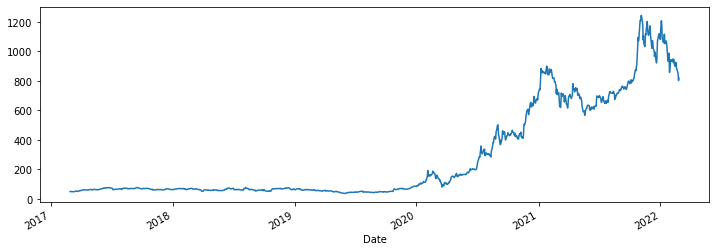

In [5]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

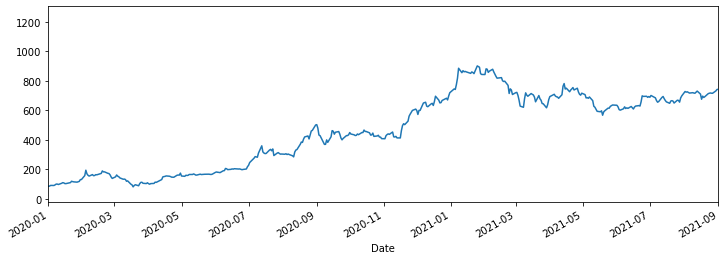

In [6]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

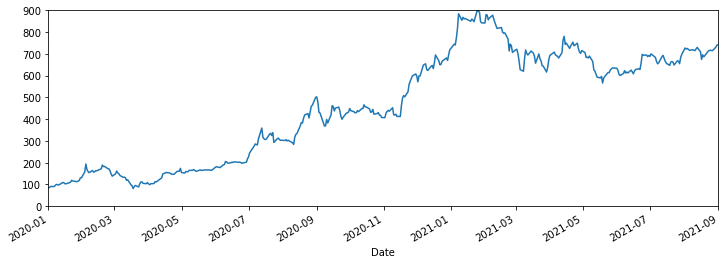

In [7]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

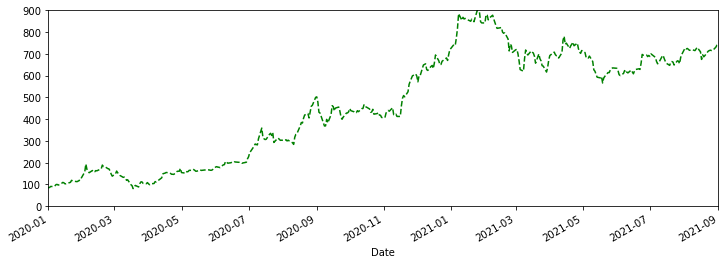

In [8]:
## xlimit and y limit and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),ls='--',c='green')

In [9]:
df_tesla.index

DatetimeIndex(['2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03',
               '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13',
               ...
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [10]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [11]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

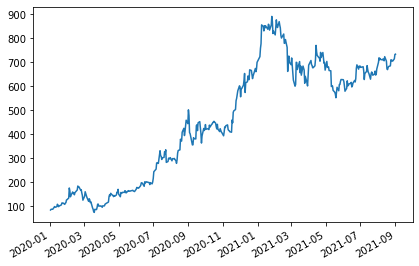

In [13]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [14]:
df_tesla=df_tesla.reset_index()

In [15]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [16]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [17]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001


In [18]:
## datetime
from datetime import datetime

In [19]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

## Time Resampling

In [20]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001


In [21]:
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.556000,48.838001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


In [22]:
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

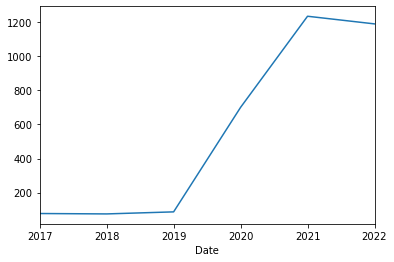

In [23]:
##year end frequency
df_tesla.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

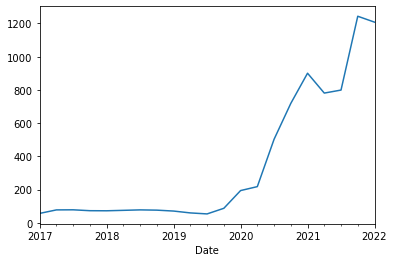

In [24]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='QS').max()['High'].plot()

In [25]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


In [26]:
df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,56.400002,55.442001,55.745998,55.660000,39938000.0,55.660000
2017-04-03,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-03,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


<AxesSubplot:xlabel='Date'>

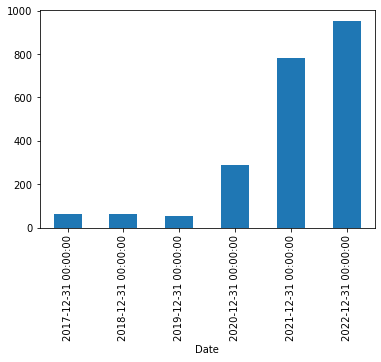

In [27]:
##plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

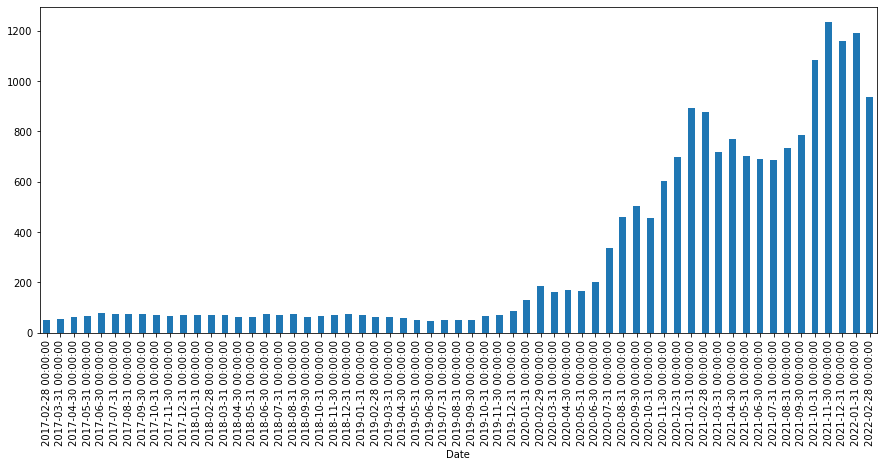

In [28]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [29]:
df_tesla['High'].rolling(11).max().head(20)

Date
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10          NaN
2017-03-13          NaN
2017-03-14    51.624001
2017-03-15    52.200001
2017-03-16    53.150002
2017-03-17    53.150002
2017-03-20    53.150002
2017-03-21    53.150002
2017-03-22    53.150002
2017-03-23    53.150002
2017-03-24    53.150002
2017-03-27    54.113998
Name: High, dtype: float64

In [30]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001


In [36]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [37]:
df_tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001,NaN
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002,NaN
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001,NaN
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999,NaN
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,NaN
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,NaN
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,NaN
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,NaN
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,NaN


<AxesSubplot:xlabel='Date'>

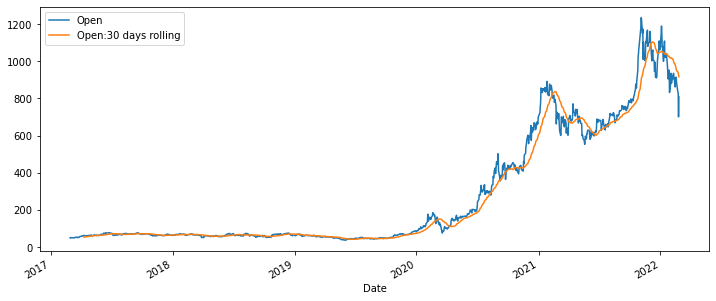

In [33]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))